In [22]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': 'dc6e9f70-d70f-46b0-8662-c3ed9a7cab29',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

{'status': {'timestamp': '2025-04-24T18:37:27.435Z', 'error_code': 0, 'error_message': None, 'elapsed': 15, 'credit_count': 1, 'notice': None, 'total_count': 9810}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 12051, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

In [24]:
type(data)

dict

In [75]:
import pandas as pd

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [28]:
pd.json_normalize(data['status'])

,timestamp,error_code,error_message,elapsed,credit_count,notice,total_count
0,2025-04-24T18:37:27.435Z,0,None,15,1,None,9810


In [57]:
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': 'dc6e9f70-d70f-46b0-8662-c3ed9a7cab29',
    }
    
    session = Session()
    session.headers.update(headers)
    
    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)

df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df_append = pd.DataFrame(df2)
df = pd.concat([df,df_append])
df

if not os.path.isfile(r'C:\Users\yashv\OneDrive - University of Massachusetts\Portfolio Projects\PortfolioProjects\API1.csv'):
    df.to_csv(r'C:\Users\yashv\OneDrive - University of Massachusetts\Portfolio Projects\PortfolioProjects\API1.csv' , header = 'column_names')
else:
    df.to_csv(r'C:\Users\yashv\OneDrive - University of Massachusetts\Portfolio Projects\PortfolioProjects\API1.csv' , mode = 'a', header = False)



In [59]:
import os 
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print('API Runner completed sucessfully !!')
    sleep(60) #sleep for 1 minute
exit()

API Runner completed sucessfully !!
API Runner completed sucessfully !!


KeyboardInterrupt: 

In [63]:
df3 = pd.read_csv(r'C:\Users\yashv\OneDrive - University of Massachusetts\Portfolio Projects\PortfolioProjects\API1.csv')
df3

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,...,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,12051,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",2.100000e+07,1.985559e+07,...,63.4087,1.957961e+12,NaN,2025-04-24T18:36:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-04-24 15:38:35.359235
1,1,1027,Ethereum,ETH,ethereum,10150,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,1.207156e+08,...,7.2809,2.125697e+11,NaN,2025-04-24T18:36:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-04-24 15:38:35.359235
2,2,825,Tether USDt,USDT,tether,125378,2015-02-25T00:00:00.000Z,"['stablecoin', 'asset-backed-stablecoin', 'usd...",NaN,1.456481e+11,...,4.9898,1.485624e+11,NaN,2025-04-24T18:35:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2025-04-24 15:38:35.359235
3,3,52,XRP,XRP,xrp,1594,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",1.000000e+11,5.839417e+10,...,4.4023,2.201047e+11,NaN,2025-04-24T18:35:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-04-24 15:38:35.359235
4,4,1839,BNB,BNB,bnb,2492,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,1.408905e+08,...,2.8821,8.414369e+10,NaN,2025-04-24T18:36:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-04-24 15:38:35.359235
5,5,5426,Solana,SOL,solana,902,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,5.173125e+08,...,2.6914,9.101053e+10,NaN,2025-04-24T18:35:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-04-24 15:38:35.359235
6,6,3408,USDC,USDC,usd-coin,27334,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,6.172840e+10,...,2.1140,6.172104e+10,NaN,2025-04-24T18:35:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2025-04-24 15:38:35.359235
7,7,74,Dogecoin,DOGE,dogecoin,1209,2013-12-15T00:00:00.000Z,"['mineable', 'pow', 'scrypt', 'medium-of-excha...",NaN,1.489886e+11,...,0.9178,2.679662e+10,NaN,2025-04-24T18:36:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-04-24 15:38:35.359235
8,8,2010,Cardano,ADA,cardano,1506,2017-10-01T00:00:00.000Z,"['dpos', 'pos', 'platform', 'research', 'smart...",4.500000e+10,3.529030e+10,...,0.8809,3.279367e+10,NaN,2025-04-24T18:36:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-04-24 15:38:35.359235
9,9,1958,TRON,TRX,tron,1166,2017-09-13T00:00:00.000Z,"['media', 'payments', 'tron-ecosystem', 'layer...",NaN,9.493978e+10,...,0.8029,2.344163e+10,NaN,2025-04-24T18:36:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-04-24 15:38:35.359235


In [67]:
pd.options.display.float_format = '{:,.2f}'.format

In [77]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,12051,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...","21,000,000.00","19,855,590.00","19,855,590.00",False,NaN,1,NaN,NaN,None,2025-04-24T18:36:00.000Z,"93,236.24","31,280,428,313.53",-39.77,0.29,-0.66,9.16,6.11,-2.66,-12.76,"1,851,260,467,558.06",63.41,"1,957,960,947,960.71",None,2025-04-24T18:36:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-04-24 15:38:35.359235
1,1027,Ethereum,ETH,ethereum,10150,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,"120,715,603.19","120,715,603.19",True,NaN,2,NaN,NaN,None,2025-04-24T18:36:00.000Z,"1,760.91","15,484,617,199.38",-39.36,0.27,-2.13,9.32,-14.80,-37.40,-48.12,"212,569,680,268.67",7.28,"212,569,680,268.67",None,2025-04-24T18:36:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-04-24 15:38:35.359235
2,825,Tether USDt,USDT,tether,125378,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, usd-stab...",NaN,"145,648,071,863.18","148,529,468,602.74",True,NaN,3,NaN,NaN,None,2025-04-24T18:35:00.000Z,1.00,"70,353,996,109.18",-32.38,-0.01,-0.00,0.02,-0.02,0.01,0.01,"145,680,409,917.07",4.99,"148,562,446,409.44",None,2025-04-24T18:35:00.000Z,"1,027.00",Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2025-04-24 15:38:35.359235
3,52,XRP,XRP,xrp,1594,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, xrp...","100,000,000,000.00","58,394,167,593.00","99,986,232,255.00",False,NaN,4,NaN,NaN,None,2025-04-24T18:35:00.000Z,2.20,"4,239,245,548.98",-27.67,0.27,-1.75,4.95,-10.34,-14.11,-30.28,"128,528,299,689.27",4.40,"220,104,686,798.69",None,2025-04-24T18:35:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-04-24 15:38:35.359235
4,1839,BNB,BNB,bnb,2492,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,"140,890,537.08","140,890,537.08",False,NaN,5,NaN,NaN,None,2025-04-24T18:36:00.000Z,597.23,"1,593,111,078.89",-15.26,0.01,-1.64,0.76,-5.42,-8.61,-13.05,"84,143,689,396.16",2.88,"84,143,689,396.16",None,2025-04-24T18:36:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-04-24 15:38:35.359235
5,5426,Solana,SOL,solana,902,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,"517,312,497.66","599,172,556.69",True,NaN,6,NaN,NaN,None,2025-04-24T18:35:00.000Z,151.89,"3,856,669,384.28",-28.36,1.06,0.11,12.30,4.77,-9.89,-42.38,"78,576,504,608.35",2.69,"91,010,531,109.73",None,2025-04-24T18:35:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-04-24 15:38:35.359235
6,3408,USDC,USDC,usd-coin,27334,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,"61,728,403,249.95","61,728,403,249.95",False,NaN,7,NaN,NaN,None,2025-04-24T18:35:00.000Z,1.00,"11,243,387,521.00",-29.09,-0.00,-0.02,-0.01,-0.01,-0.01,0.01,"61,721,036,982.12",2.11,"61,721,036,982.12",None,2025-04-24T18:35:00.000Z,"1,027.00",Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2025-04-24 15:38:35.359235
7,74,Dogecoin,DOGE,dogecoin,1209,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,"148,988,556,383.71","148,988,556,383.71",True,NaN,8,NaN,NaN,None,2025-04-24T18:36:00.000Z,0.18,"1,409,523,130.95",-32.80,0.45,-0.44,13.23,-6.59,-25.96,-49.98,"26,796,616,383.77",0.92,"26,796,616,383.77",None,2025-04-24T18:36:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-04-24 15:38:35.359235
8,2010,Cardano,ADA,cardano,1506,2017-10-01T00:00:00.000Z,"[dpos, pos, pla

In [81]:
df3 = df.groupby('name', sort = False)[['quote.USD.percent_change_1h' , 'quote.USD.percent_change_24h' , 'quote.USD.percent_change_7d' , 'quote.USD.percent_change_30d' , 'quote.USD.percent_change_60d' , 'quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,0.29,-0.66,9.16,6.11,-2.66,-12.76
Ethereum,0.27,-2.13,9.32,-14.80,-37.40,-48.12
Tether USDt,-0.01,-0.00,0.02,-0.02,0.01,0.01
XRP,0.27,-1.75,4.95,-10.34,-14.11,-30.28
BNB,0.01,-1.64,0.76,-5.42,-8.61,-13.05
Solana,1.06,0.11,12.30,4.77,-9.89,-42.38
USDC,-0.00,-0.02,-0.01,-0.01,-0.01,0.01
Dogecoin,0.45,-0.44,13.23,-6.59,-25.96,-49.98
Cardano,0.57,2.94,16.06,-2.92,-5.08,-26.95


In [103]:
df4 = df3.stack()
df4

name                                      
Bitcoin       quote.USD.percent_change_1h      0.29
              quote.USD.percent_change_24h    -0.66
              quote.USD.percent_change_7d      9.16
              quote.USD.percent_change_30d     6.11
              quote.USD.percent_change_60d    -2.66
              quote.USD.percent_change_90d   -12.76
Ethereum      quote.USD.percent_change_1h      0.27
              quote.USD.percent_change_24h    -2.13
              quote.USD.percent_change_7d      9.32
              quote.USD.percent_change_30d   -14.80
              quote.USD.percent_change_60d   -37.40
              quote.USD.percent_change_90d   -48.12
Tether USDt   quote.USD.percent_change_1h     -0.01
              quote.USD.percent_change_24h    -0.00
              quote.USD.percent_change_7d      0.02
              quote.USD.percent_change_30d    -0.02
              quote.USD.percent_change_60d     0.01
              quote.USD.percent_change_90d     0.01
XRP           quote.U

In [105]:
df5 = df4.to_frame(name='values')
df5

values
name                                             
Bitcoin      quote.USD.percent_change_1h     0.29
             quote.USD.percent_change_24h   -0.66
             quote.USD.percent_change_7d     9.16
             quote.USD.percent_change_30d    6.11
             quote.USD.percent_change_60d   -2.66
             quote.USD.percent_change_90d  -12.76
Ethereum     quote.USD.percent_change_1h     0.27
             quote.USD.percent_change_24h   -2.13
             quote.USD.percent_change_7d     9.32
             quote.USD.percent_change_30d  -14.80
             quote.USD.percent_change_60d  -37.40
             quote.USD.percent_change_90d  -48.12
Tether USDt  quote.USD.percent_change_1h    -0.01
             quote.USD.percent_change_24h   -0.00
             quote.USD.percent_change_7d     0.02
             quote.USD.percent_change_30d   -0.02
             quote.USD.percent_change_60d    0.01
             quote.USD.percent_change_90d    0.01
XRP          quote.USD.percent_change_1h     0.27
             quote.USD.percent_change_24h   -1.75
             quote.USD.percent_change_7d     4.95
             quote.USD.percent_change_30d  -10.34
             quote.USD.percent_change_60d  -14.11
             quote.USD.percent_change_90d  -30.28
BNB          quote.USD.percent_change_1h     0.01
             quote.USD.percent_change_24h   -1.64
             quote.USD.percent_change_7d     0.76
             quote.USD.percent_change_30d   -5.42
             quote.USD.percent_change_60d   -8.61
             quote.USD.percent_change_90d  -13.05
Solana       quote.USD.percent_change_1h     1.06
             quote.USD.percent_change_24h    0.11
             quote.USD.percent_change_7d    12.30
             quote.USD.percent_change_30d    4.77
             quote.USD.percent_change_60d   -9.89
             quote.USD.percent_change_90d  -42.38
USDC         quote.USD.percent_change_1h    -0.00
             quote.USD.percent_change_24h   -0.02
             quote.USD.percent_change_7d    -0.01
             quote.USD.percent_change_30d   -0.01
             quote.USD.percent_change_60d   -0.01
             quote.USD.percent_change_90d    0.01
Dogecoin     quote.USD.percent_change_1h     0.45
             quote.USD.percent_change_24h   -0.44
             quote.USD.percent_change_7d    13.23
             quote.USD.percent_change_30d   -6.59
             quote.USD.percent_change_60d  -25.96
             quote.USD.percent_change_90d  -49.98
Cardano      quote.USD.percent_change_1h     0.57
             quote.USD.percent_change_24h    2.94
             quote.USD.percent_change_7d    16.06
             quote.USD.percent_change_30d   -2.92
             quote.USD.percent_change_60d   -5.08
             quote.USD.percent_change_90d  -26.95
TRON         quote.USD.percent_change_1h     0.14
             quote.USD.percent_change_24h    0.50
             quote.USD.percent_change_7d    -1.04
             quote.USD.percent_change_30d    8.35
             quote.USD.percent_change_60d    1.15
             quote.USD.percent_change_90d   -4.77
Sui          quote.USD.percent_change_1h     1.08
             quote.USD.percent_change_24h    8.78
             quote.USD.percent_change_7d    53.84
             quote.USD.percent_change_30d   35.41
             quote.USD.percent_change_60d   -0.16
             quote.USD.percent_change_90d  -24.95
Chainlink    quote.USD.percent_change_1h     0.95
             quote.USD.percent_change_24h    0.03
             quote.USD.percent_change_7d    18.45
             quote.USD.percent_change_30d   -2.88
             quote.USD.percent_change_60d  -15.02
             quote.USD.percent_change_90d  -42.40
Avalanche    quote.USD.percent_change_1h     0.60
             quote.USD.percent_change_24h   -0.97
             quote.USD.percent_change_7d    14.60
             quote.USD.percent_change_30d   -3.39
             quote.USD.percent_change_60d   -9.70
             quote.USD.percent_change_90d  -39.46
Stellar      quote.USD.percent_change_1h   

In [107]:
df5 = df5.reset_index()
df5

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,0.29
1,Bitcoin,quote.USD.percent_change_24h,-0.66
2,Bitcoin,quote.USD.percent_change_7d,9.16
3,Bitcoin,quote.USD.percent_change_30d,6.11
4,Bitcoin,quote.USD.percent_change_60d,-2.66
5,Bitcoin,quote.USD.percent_change_90d,-12.76
6,Ethereum,quote.USD.percent_change_1h,0.27
7,Ethereum,quote.USD.percent_change_24h,-2.13
8,Ethereum,quote.USD.percent_change_7d,9.32
9,Ethereum,quote.USD.percent_change_30d,-14.80


In [109]:
df5 = df5.rename(columns={'level_1' : 'percent_change'})
df5

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,0.29
1,Bitcoin,quote.USD.percent_change_24h,-0.66
2,Bitcoin,quote.USD.percent_change_7d,9.16
3,Bitcoin,quote.USD.percent_change_30d,6.11
4,Bitcoin,quote.USD.percent_change_60d,-2.66
5,Bitcoin,quote.USD.percent_change_90d,-12.76
6,Ethereum,quote.USD.percent_change_1h,0.27
7,Ethereum,quote.USD.percent_change_24h,-2.13
8,Ethereum,quote.USD.percent_change_7d,9.32
9,Ethereum,quote.USD.percent_change_30d,-14.80


In [117]:
df5['percent_change'] = df5['percent_change'].replace(['quote.USD.percent_change_1h' , 'quote.USD.percent_change_24h' , 'quote.USD.percent_change_7d' , 'quote.USD.percent_change_30d' , 'quote.USD.percent_change_60d' , 'quote.USD.percent_change_90d'],['1h' , '24h' , '7d' , '30d' , '60d' , '90d'])
df5

,name,percent_change,values
0,Bitcoin,1h,0.29
1,Bitcoin,24h,-0.66
2,Bitcoin,7d,9.16
3,Bitcoin,30d,6.11
4,Bitcoin,60d,-2.66
5,Bitcoin,90d,-12.76
6,Ethereum,1h,0.27
7,Ethereum,24h,-2.13
8,Ethereum,7d,9.32
9,Ethereum,30d,-14.80


In [111]:
import seaborn as sns
import matplotlib.pyplot as plt

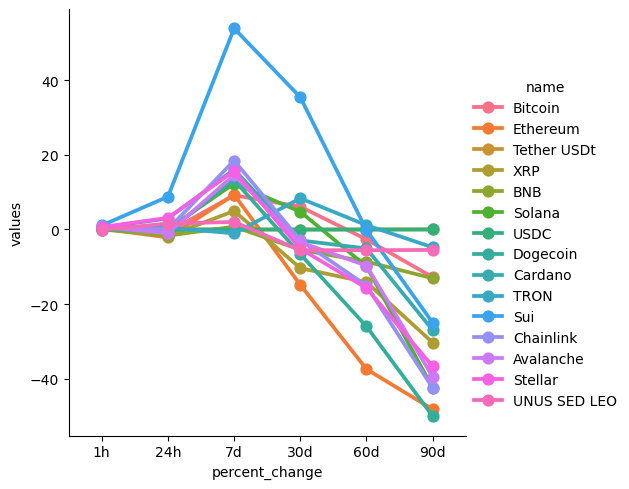

In [119]:
sns.catplot(x='percent_change', y='values', hue='name', data=df5, kind='point')


In [125]:
df5 = df[['name','quote.USD.price','timestamp']]
df5 = df5.query("name == 'Ethereum'")
df5

,name,quote.USD.price,timestamp
1,Ethereum,"1,760.91",2025-04-24 15:38:35.359235
1,Ethereum,"1,760.91",2025-04-24 14:56:30.889565


<Axes: xlabel='timestamp', ylabel='quote.USD.price'>

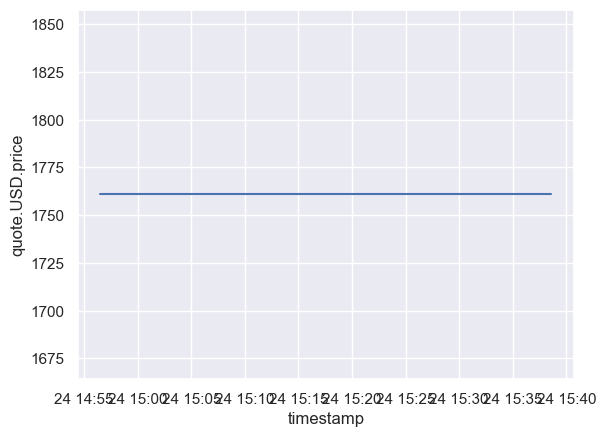

In [127]:
sns.set_theme(style="darkgrid")

sns.lineplot(x='timestamp', y='quote.USD.price', data = df5)